<a href="https://colab.research.google.com/github/jcmachicaocuf/codigos_CUF_LLM_NLP/blob/main/U1_red_conceptual_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 21.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import requests
import es_core_news_sm
import re

In [ ]:
nlp = es_core_news_sm.load()

In [ ]:
# No usar el directo, sino el RAW. Este es el directo url_text = 'https://github.com/jcmachicaocuf/codigos_CUF_LLM_NLP/blob/main/U1_Foro1_quijote_cap1.txt'
url_text = 'https://raw.githubusercontent.com/jcmachicaocuf/codigos_CUF_LLM_NLP/main/U1_Foro1_quijote_cap1.txt'
response = requests.get(url_text)
texto = response.text

In [ ]:
def clean_text(text):
    #text = re.sub(r'[^\w\s]', '', text) # Esto sirve para quitar caracteres que no son palabras
    text = re.sub(r'\d+', '', text) # Esto sirve para quitar dígitos
    text = text.replace('\r', ' ').replace('\n', ' ')
    text = text.lower() # Esto sirve para convertir todo a minusulas
    return text

In [ ]:
texto = clean_text(texto)

In [ ]:
texto

'en un lugar de la mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. el resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. tenía en su casa una ama que pasaba de los cuarenta y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza que así ensillaba el rocín como tomaba la podadera. frisaba la edad de nuestro hidalgo con los cincuenta años. era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. quieren decir que tenía el sobrenombre de «quijada», o «quesada», que en esto hay alguna diferencia en los autore

In [ ]:
doc = nlp(texto)

In [ ]:
vocabulario = set()
for token in doc:
  if not token.is_stop and not token.is_punct:  # Omitir palabras vacías y signos de puntuación
    vocabulario.add(token.text)
vocabulario = list(vocabulario)
print(vocabulario)

['zaga', 'desafíos', 'dellos', 'industria', 'pantuflos', 'mayores', 'llorón', 'fieros', 'madrugador', 'mahoma', 'maese', '   ', 'autor', 'cielos', 'roldán', 'pie', 'letra', 'disparates', 'tomar', 'díaz', 'ingalaterra', 'corredor', 'sobredicho', 'sacara', 'imaginaba', 'añadidura', 'enfrascó', 'adarga', 'hiciera', 'libro', 'febo', 'encantamentos', 'mancha', 'galalón', 'nombre', 'compuso', 'ensillaba', 'leía', 'lugar', 'estrellas', 'merecedora', 'saliera', 'cigüenza', 'quiero', 'honraba', 'acomodada', 'entricadas', 'entenderlas', 'promete', 'imposibles', 'caso', 'revés', 'hubiesen', 'razón', 'maestros', 'vendió', 'desvelábase', 'diera', 'pluma', 'soñadas', 'veía', 'lanza', 'escrito', 'invencionesvi', 'duda', 'seco', 'competencia', 'hallaba', 'carnes', 'galgo', 'dejaría', 'gaula', 'coces', 'roncesvalles', 'gusto', 'olla', 'años', 'continuos', 'graduado', 'generación', 'gigantea', 'tanta', 'mano', 'tiempo', 'estorbaran', 'promesa', 'amores', 'diferencia', 'máquina', 'afición', 'cartas', 'ca

In [ ]:
for k,sent in enumerate(doc.sents):
  print(k, sent.text[0:20], end=' * ')

0 en un lugar de la ma * 1 una olla de algo más * 2 el resto della concl * 3 tenía en su casa una * 4 frisaba la edad de n * 5 era de complexión re * 6 quieren decir que te * 7 pero esto importa po * 8 es, pues, de saber q * 9 y también cuando leí * 10 no estaba muy bien c * 11 pero, con todo, alab * 12 tuvo muchas veces co * 13 en resolución, él se * 14 llenósele la fantasí * 15 decía él que el cid  * 16 mejor estaba con ber * 17 decía mucho bien del * 18 pero, sobre todos, e * 19 diera él, por dar un * 

In [ ]:
def get_adjacent_subjects_and_verbs(sent):
    subjects_and_verbs = []
    for token in sent:
        if token.dep_ in ('nsubj', 'nsubj_pass', 'csubj', 'csubj_pass') or token.pos_ == "VERB" or token.dep_ in ('ROOT', 'aux', 'auxpass', 'ccomp', 'xcomp', 'advcl', 'relcl'):
            subjects_and_verbs.append(token)
    # Find adjacent subjects and verbs
    edges = []
    for i in range(len(subjects_and_verbs) - 1):
      edges.append((subjects_and_verbs[i].text, subjects_and_verbs[i+1].text))
    return edges

In [ ]:
k_lim=8
G = nx.DiGraph()
print('conteo: ')

for k,sent in enumerate(doc.sents):
  if k<k_lim:
    print(k, end=' ')
    edges = get_adjacent_subjects_and_verbs(sent)
    for edge in edges:
      G.add_edge(*edge)
  else:
    pass

conteo: 
0 1 2 3 4 5 6 7 

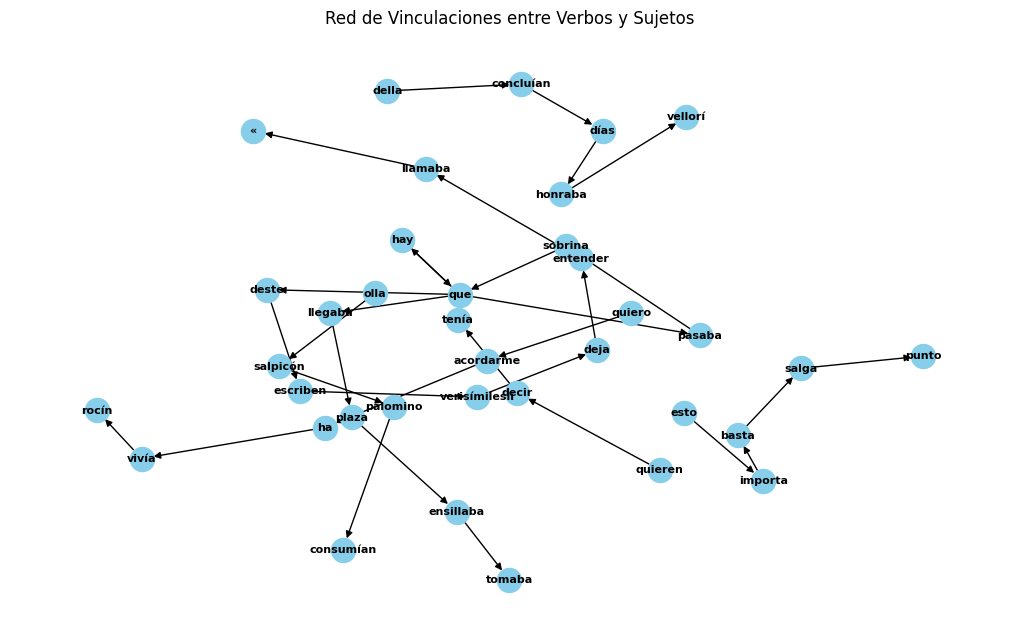

In [ ]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.4)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_weight='bold', arrows=True)
plt.title('Red de Vinculaciones entre Verbos y Sujetos')
plt.show()